In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Using Generators to label data

In [2]:

train_dataset = keras.utils.image_dataset_from_directory(
directory='/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    )
validation_dataset = keras.utils.image_dataset_from_directory(
directory='/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    )


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# Normalizing Data

In [4]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dataste = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

# Building a Custom CNN

In [35]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 38s 56ms/step - loss: 1.3670 - accuracy: 0.5403 - val_loss: 0.6997 - val_accuracy: 0.5004
Epoch 2/10
625/625 [==============================] - 35s 55ms/step - loss: 0.7253 - accuracy: 0.5697 - val_loss: 1.0144 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 35s 55ms/step - loss: 0.6834 - accuracy: 0.5689 - val_loss: 0.8390 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 35s 56ms/step - loss: 0.6639 - accuracy: 0.6170 - val_loss: 0.8881 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 35s 55ms/step - loss: 0.6365 - accuracy: 0.6370 - val_loss: 0.9411 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 35s 56ms/step - loss: 0.6083 - accuracy: 0.6543 - val_loss: 0.9745 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 36s 57ms/step - loss: 0.5983 - accuracy: 0.6667 - val_loss: 1.6456 - val_accuracy:

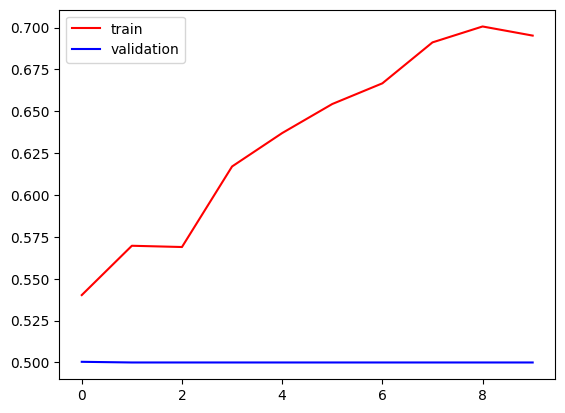

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

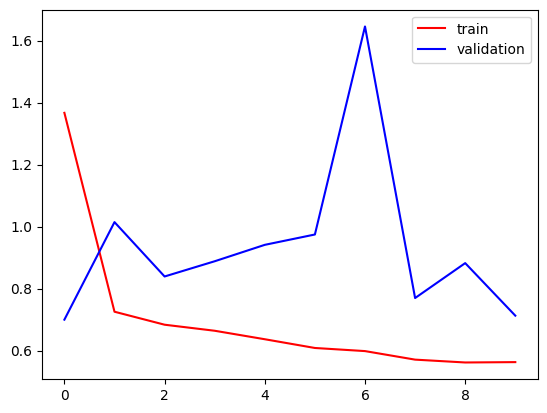

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Testing of Untrained Image

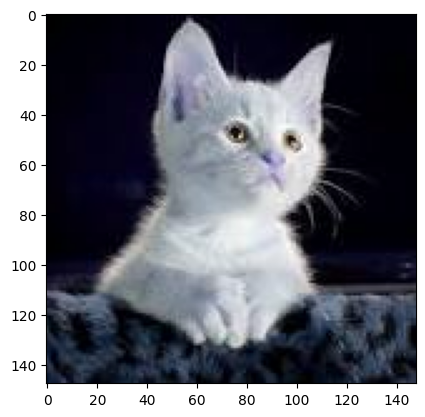

In [40]:
import cv2
untrained_img1 = cv2.imread('/kaggle/input/dogandcat/cat.jpeg')
plt.imshow(untrained_img1)

In [41]:
untrained_img1.shape

(148, 148, 3)

In [42]:
untrained_img1 = cv2.resize(untrained_img1,(256,256))
untrained_input1 = untrained_img1.reshape((1,256,256,3))

In [43]:
model.predict(untrained_input1)

1/1 [==============================] - 0s 110ms/step


array([[0.34673196]], dtype=float32)

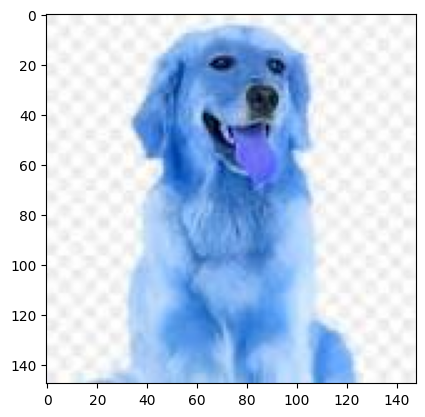

In [44]:
untrained_img2 = cv2.imread('/kaggle/input/dogandcat/download.jpeg')
plt.imshow(untrained_img2)

In [45]:
untrained_img2.shape

(148, 148, 3)

In [46]:
untrained_img2 = cv2.resize(untrained_img2,(256,256))
untrained_input2 = untrained_img2.reshape((1,256,256,3))

In [47]:
model.predict(untrained_input2)

1/1 [==============================] - 0s 18ms/step


array([[0.7565355]], dtype=float32)